### **Pertemuan 6**

Riza Anwar Fadil - 1227050116


Menambahkan Efek Fade In/Out dan Manipulasi Kecepatan
Playback Audio

In [ ]:
from	pydub	import	AudioSegment
#	Membaca	file	audio	(pastikan	ffmpeg	terinstal)
audio	=	AudioSegment.from_file("sample-6s.mp3",	format="mp3")
#	Menambahkan	fade	in	2	detik	dan	fade	out	3	detik
faded_audio	=	audio.fade_in(2000).fade_out(3000)
#	Menyimpan	hasil
faded_audio.export("audio_fade.mp3",	format="mp3")

<_io.BufferedRandom name='audio_fade.mp3'>

Manipulasi Kecepatan Playback

In [ ]:
import	librosa
import	soundfile	as	sf
#	Membaca	audio
y,	sr	=	librosa.load("sample-6s.mp3")
#	Mengubah	kecepatan	(misalnya:	1.5	kali	lebih	cepat)
y_fast	=	librosa.effects.time_stretch(y,	rate=1.5)
#	Menyimpan	hasil	audio
sf.write("audio_fast.wav",	y_fast,	sr)


Diskusi
1. Apa fungsi dari efek fade in dan fade out dalam produksi audio?
2. Apa dampak dari manipulasi kecepatan terhadap kualitas suara?
3. Kapan sebaiknya menggunakan time-stretch dibanding pitch-shift?
4. Apakah hasil audio setelah dipercepat akan berubah durasinya? Jelaskan.
5. Apa perbedaan hasil efek fade antara format MP3 dan WAV?

### 1. Apa fungsi dari efek fade in dan fade out dalam produksi audio?
Efek fade in berfungsi untuk secara bertahap meningkatkan volume suara dari diam hingga volume normal di awal audio. Sebaliknya, fade out digunakan untuk menurunkan volume secara perlahan hingga diam di akhir audio. Fungsi utama dari efek ini adalah untuk membuat transisi audio menjadi lebih halus, menghindari suara yang tiba-tiba muncul atau menghilang, serta memberikan kesan profesional dan nyaman didengar.

---

### 2. Apa dampak dari manipulasi kecepatan terhadap kualitas suara?
Manipulasi kecepatan (speed change) dapat berdampak pada pitch dan kualitas suara. Jika kecepatan ditingkatkan:
- Suara akan menjadi lebih cepat dan bernada tinggi (seperti chipmunk).
- Sebaliknya, jika diperlambat, suara menjadi lebih lambat dan bernada rendah.
- Manipulasi ekstrem dapat menyebabkan distorsi atau artefak digital yang membuat suara terdengar tidak natural atau rusak.

---

### 3. Kapan sebaiknya menggunakan time-stretch dibanding pitch-shift?
Gunakan time-stretch ketika ingin mengubah durasi audio tanpa mengubah pitch (nada). Misalnya, memperlambat atau mempercepat rekaman suara tetapi tetap mempertahankan ketinggian nada aslinya.

Gunakan pitch-shift jika ingin mengubah nada (tinggi/rendah suara) tanpa mengubah durasi, contohnya saat ingin menaikkan/menurunkan kunci lagu.

---

### 4. Apakah hasil audio setelah dipercepat akan berubah durasinya? Jelaskan.
Ya, durasinya akan berubah. Jika audio dipercepat, maka durasi akan menjadi lebih pendek karena audio diputar dalam waktu yang lebih singkat. Begitu juga sebaliknya, jika diperlambat maka durasinya menjadi lebih panjang. Perubahan ini terjadi karena kecepatan pemutaran langsung mempengaruhi berapa lama file audio tersebut berlangsung.

---

### 5. Apa perbedaan hasil efek fade antara format MP3 dan WAV?
Secara umum, efek fade (baik fade in maupun fade out) bekerja serupa secara prinsip pada kedua format. Namun:

- WAV adalah format lossless, sehingga hasil fade lebih presisi dan berkualitas tinggi, tanpa kehilangan detail suara.
- MP3 adalah format lossy, sehingga ada kompresi data yang dapat menyebabkan artefak kecil saat efek fade diterapkan, terutama jika bitrate rendah.

Jadi, hasil fade pada WAV biasanya lebih bersih dan detail dibandingkan MP3.


**TUGAS**

Menambahkan efek fade in/out pada 2 file audio dengan durasi berbeda.

In [ ]:
from pydub import AudioSegment

audio1 = AudioSegment.from_file("sample-6s.mp3")
audio2 = AudioSegment.from_file("file_example_MP3_1MG.mp3")

faded1 = audio1.fade_in(1000).fade_out(2000)
faded2 = audio2.fade_in(2000).fade_out(3000)

faded1.export("audio1_fade.mp3", format="mp3")
faded2.export("audio2_fade.wav", format="wav")


<_io.BufferedRandom name='audio2_fade.wav'>

Ubah kecepatan playback jadi 0.75x dan 1.5x, lalu bandingkan.

In [ ]:
from pydub import AudioSegment
import os

# Fungsi untuk mengubah kecepatan playback
def change_speed(sound, speed=1.0):
    # Ubah frame rate untuk mengatur kecepatan
    sound_with_altered_frame_rate = sound._spawn(sound.raw_data, overrides={
         "frame_rate": int(sound.frame_rate * speed)
      })
    return sound_with_altered_frame_rate.set_frame_rate(sound.frame_rate)

# Baca file audio asli
audio = AudioSegment.from_file("file_example_MP3_1MG.mp3", format="mp3")

# Kecepatan 0.75x (lebih lambat)
slower_audio = change_speed(audio, 0.75)
slower_audio.export("file_example_MP3_1MG-slow.mp3", format="mp3")

# Kecepatan 1.5x (lebih cepat)
faster_audio = change_speed(audio, 1.5)
faster_audio.export("file_example_MP3_1MG-fast.mp3", format="mp3")

print("Berhasil menyimpan file dengan kecepatan berbeda: slow dan fast.")


Berhasil menyimpan file dengan kecepatan berbeda: slow dan fast.


Simulasikan fade in (pembukaan podcast) dan fade out (penutup).

In [ ]:
podcast = AudioSegment.from_file("sample-6s.mp3")
intro_fade = podcast.fade_in(3000)
outro_fade = podcast.fade_out(3000)

intro_fade.export("podcast_fadein.mp3", format="mp3")
outro_fade.export("podcast_fadeout.mp3", format="mp3")


<_io.BufferedRandom name='podcast_fadeout.mp3'>

 Gabungkan efek fade dan tempo. Analisis:

In [ ]:
import librosa
import soundfile as sf

# Load audio
y, sr = librosa.load("sample-6s.mp3")

# Ubah ke STFT
D = librosa.stft(y)

# Lakukan time-stretch pada STFT
D_stretch = librosa.phase_vocoder(D, rate=1.2, hop_length=512)

# Kembali ke bentuk audio
y_stretched = librosa.istft(D_stretch, hop_length=512)

# Simpan hasil
sf.write("audio_fade_tempo.wav", y_stretched, sr)


Analisis: Gabungan efek ini memberikan hasil audio dengan transisi halus dan tempo dinamis. Cocok untuk kebutuhan profesional seperti iklan atau intro video.

Explore Streamlit sebagai UI playback audio

In [ ]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.6 MB/s eta 0:00:00


In [ ]:
# streamlit_audio_app.py
import streamlit as st

st.title("Audio Player with Fade/Tempo Effect")

audio_file = open('/audio_example.wav', 'rb')
audio_bytes = audio_file.read()

st.audio(audio_bytes, format='audio/wav')


2025-04-09 08:51:56.076 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 08:51:56.339 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-09 08:51:56.343 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 08:51:56.358 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 08:51:56.365 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 08:51:56.366 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

Laporan Eksperimen dan Visualisasi Waveform

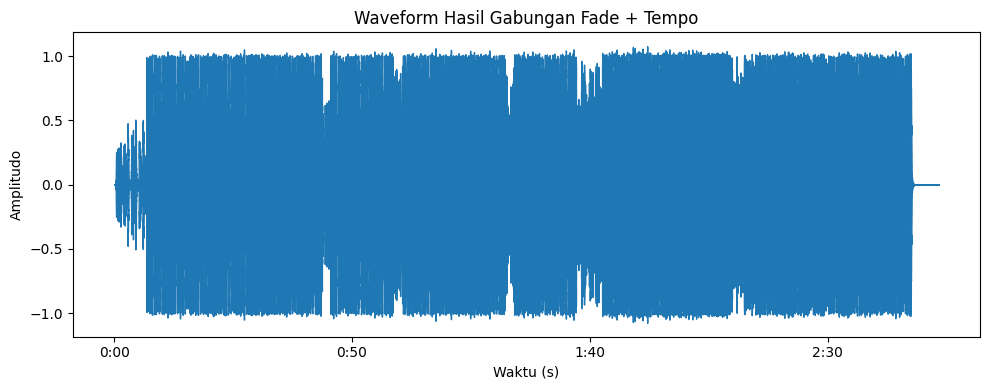

In [ ]:
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load("/audio_example.wav")
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform Hasil Gabungan Fade + Tempo")
plt.xlabel("Waktu (s)")
plt.ylabel("Amplitudo")
plt.tight_layout()
plt.savefig("waveform_output.png")
plt.show()
